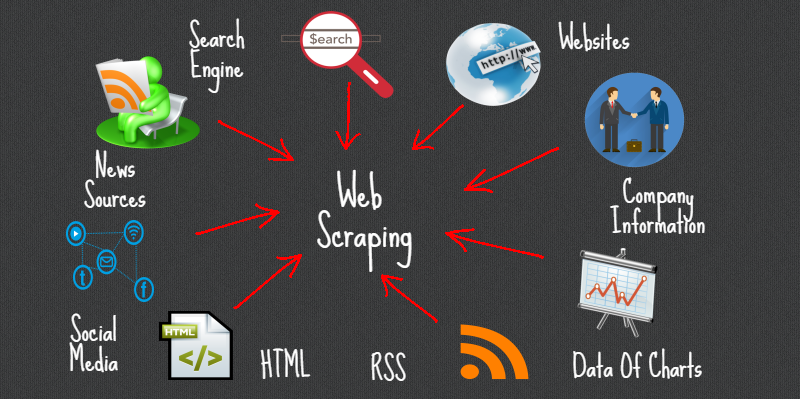

<center><h1> Testing Requests-HTML Web Parser <h1/></center>

<h2> What is web scraping all about? </h2>

Well, according to Wikipedia, <br>

<b>*Web scraping, web harvesting, or web data extraction is data scraping used for extracting data from websites. While web scraping can be done manually by a software user, the term typically refers to automated processes implemented using a bot or web crawler. It is a form of copying, in which specific data is gathered and copied from the web, typically into a central local database or spreadsheet, for later retrieval or analysis.*</b>

Most websites do not offer the functionality to save a copy of this data for personal use. The only option then is to manually copy and paste the data which can become very tedious to complete. Web Scraping is the technique of automating this process, so that instead of manually copying the data from websites, the Web Scraper will help you to perform the same task within a fraction of the time. Ok sounds great, but how this works exactly? 

For this first try, I am going to use <b>- Requests-HTML -</b>a library intending to make parsing HTML as simple and intuitive as possible.This library has been created by Kenneth Reitz, the first version has been released on February 2018 and the last update was made on February 2019, - 10.3k stars, 644 forks, 83 reported issues - let's check it out!

I think the best way to test the efficacy if this tool will be to go through the github tutorial (https://github.com/psf/requests-html/blob/master/README.rst), follow it step by step to try to gather some data I am interested in.

Here is a brief description of how I am going to proceed:
    1. Install request-html
    2. Make basic requests
    3. Try more complex requests
    4. Share my final thoughts about the library

<h3> 1. Install Library </h3>

Please note that only **Python 3.6** is supported, not ideal as **Python 3.8** just came out, but let's downgrade to Python 3.6 and pip install the library:
```bash
> pip install requests-html```

<h3> 2. Make Basic Requests </h3>

Let's import `HTMLSession`.

In [1]:
from requests_html import HTMLSession
session = HTMLSession()

And make a `get` request, which allows us to connect to the url we want to connect to:

In [2]:
r = session.get('https://www.elections.ca/home.aspx')

Then, it becomes easy to grab the list of all links on the page by using `html.links`:

In [3]:
r.html.links

{'/Scripts/vis/FindED?L=e&QID=-1&PAGEID=20',
 '/content.aspx?section=abo&dir=pri&document=index&lang=e',
 '/content.aspx?section=abo&document=index&lang=e',
 '/content.aspx?section=cont&dir=soc&document=index&lang=e',
 '/content.aspx?section=ele&document=index&lang=e',
 '/content.aspx?section=fin&document=index&lang=e',
 '/content.aspx?section=med&document=index&lang=e',
 '/content.aspx?section=pol&dir=par&document=index&lang=e',
 '/content.aspx?section=pol&document=index&lang=e',
 '/content.aspx?section=pri&document=index&lang=e',
 '/content.aspx?section=res&dir=cir/maps2&document=index&lang=e',
 '/content.aspx?section=res&document=index&lang=e',
 '/content.aspx?section=vot&document=index&lang=e',
 '/content2.aspx?section=acc&document=index&lang=e',
 '/content2.aspx?section=can&document=index&lang=e',
 '/content2.aspx?section=conge&document=index&lang=e',
 '/content2.aspx?section=faq&dir=votinghours&document=index&lang=e',
 '/content2.aspx?section=faq&document=fac&lang=e',
 '/content2

... or the list of absolute links only with `html.absolute_links`:

In [4]:
r.html.absolute_links

{'http://laws-lois.justice.gc.ca/eng/acts/E-2.01/index.html',
 'https://enr.elections.ca/National.aspx?lang=e',
 'https://www.elections.ca/Scripts/vis/FindED?L=e&QID=-1&PAGEID=20',
 'https://www.elections.ca/accueil.aspx',
 'https://www.elections.ca/content.aspx?section=abo&dir=pri&document=index&lang=e',
 'https://www.elections.ca/content.aspx?section=abo&document=index&lang=e',
 'https://www.elections.ca/content.aspx?section=cont&dir=soc&document=index&lang=e',
 'https://www.elections.ca/content.aspx?section=ele&document=index&lang=e',
 'https://www.elections.ca/content.aspx?section=fin&document=index&lang=e',
 'https://www.elections.ca/content.aspx?section=med&document=index&lang=e',
 'https://www.elections.ca/content.aspx?section=pol&dir=par&document=index&lang=e',
 'https://www.elections.ca/content.aspx?section=pol&document=index&lang=e',
 'https://www.elections.ca/content.aspx?section=pri&document=index&lang=e',
 'https://www.elections.ca/content.aspx?section=res&dir=cir/maps2&do

Now, I want to try to select one specific item with a CSS selector, this is possible with ``html.find``:

In [5]:
voting_tab = r.html.find('#topnavlist', first=True)

And this gives me direct acces to this item's content with ``.text``:

In [6]:
print(voting_tab.text)

Voting
(Home)
Spread
the word
Jobs
Candidates, Parties
& Third Parties
Media


Awesome! Can we get all the attributes from this item now? Yep! with ``.attrs``

In [7]:
voting_tab.attrs

{'id': 'topnavlist', 'class': ('navul', 'open', 'left')}

or render out the HTML code behind it? Of course, this is easy you can use ``.html``

In [8]:
voting_tab.html

'<ul id="topnavlist" class="navul open left">\n<li class="current"><a href="/home.aspx">Voting<br/> (Home)</a></li>\n<li><a href="/content2.aspx?section=spr&amp;document=index&amp;lang=e">Spread<br/> the word</a></li>\n<li><a href="/content2.aspx?section=job&amp;document=index&amp;lang=e">Jobs</a></li>\n<li><a class="larger" href="/content2.aspx?section=can&amp;document=index&amp;lang=e">Candidates, Parties <br/>&amp; Third Parties</a></li>\n<!--<li><a class="allcaps" href="/content2.aspx?section=thi&amp;document=index&amp;lang=e">Accessibility</a></li>-->\n<li><a href="/content.aspx?section=med&amp;document=index&amp;lang=e">Media</a></li>\n</ul>'

Waouh! That's great! 

What about inspecting a particular element within this item? No problem! Use ``.find``

In [9]:
voting_tab.find('a')

[<Element 'a' href='/home.aspx'>,
 <Element 'a' href='/content2.aspx?section=spr&document=index&lang=e'>,
 <Element 'a' href='/content2.aspx?section=job&document=index&lang=e'>,
 <Element 'a' class=('larger',) href='/content2.aspx?section=can&document=index&lang=e'>,
 <Element 'a' href='/content.aspx?section=med&document=index&lang=e'>]

Here you can use ``.absolute_links`` on this specific item, just as we did earlier on the website home page.

In [10]:
voting_tab.absolute_links

{'https://www.elections.ca/content.aspx?section=med&document=index&lang=e',
 'https://www.elections.ca/content2.aspx?section=can&document=index&lang=e',
 'https://www.elections.ca/content2.aspx?section=job&document=index&lang=e',
 'https://www.elections.ca/content2.aspx?section=spr&document=index&lang=e',
 'https://www.elections.ca/home.aspx'}

It is also possible to search for text on the page we are looking at:

In [11]:
r.html.search('Elections Canada is the {} responsible for conducting federal elections and referendums.')[0]

'independent, non-partisan agency'

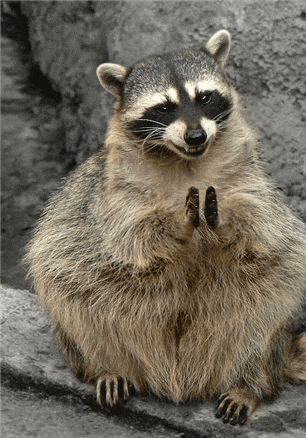

<h3> 3. Try More Complex Requests </h3>

Requests-HTML killed all basic requests, so it is time now to see how it performs when it becomes a little trickier! 

With AsyncHTMLSession, we should be able to connect to multiple urls at the same time, using functions and ``.run`` method. Also, make sure to use ``await`` along with ``.get`` to connect to an url:

In [12]:
import nest_asyncio
nest_asyncio.apply()

from requests_html import AsyncHTMLSession
asession = AsyncHTMLSession()

async def get_pythonorg():
    r = await asession.get('https://newsinteractives.cbc.ca/elections/federal/2019/results/')
    return r 
async def get_reddit():
    r = await asession.get('https://www.elections.ca/home.aspx')
    return r
async def get_google():
    r = await asession.get('https://nationalpost.com/news/politics/election-2019/canadian-federal-election-live-riding-map-results')
    return r

results = asession.run(get_pythonorg, get_reddit, get_google)
results

[<Response [200]>, <Response [200]>, <Response [200]>]

This preliminary step will allow us to send our requests to all targeted websites and use all types of requests we have used on a single url like ``.url``, ``.text``, ``.links``, etc. :

In [13]:
for result in results:
    print(result.html.url)

https://www.elections.ca/home.aspx
https://nationalpost.com/news/politics/election-2019/canadian-federal-election-live-riding-map-results
https://newsinteractives.cbc.ca/elections/federal/2019/results/


🚨 Please note that if you do not import ``nest_asyncio`` and use ``nest_asyncio.apply()`` you will receive the following runtime error: <br> > <b>RuntimeError</b>: This event loop is already running

Let's test our tool with a more complex CSS Selector:

In [14]:
r2 = session.get('https://newsinteractives.cbc.ca/elections/federal/2019/results/')
selection = '#main > section.story-cta.contents > div > div.component-intro__dek.small-margin > p'
print(r2.html.find(selection, first=True).text)

Justin Trudeau will be returning to the Prime Minister's Office, but this time he will be leading a Liberal minority government. The Bloc Québécois will enter the 43rd Parliament with a far stronger presence. The NDP surge some pollsters anticipated did not materialize but the party does have enough seats to hold the balance of power in a Liberal minority government. The Conservatives increased their share of the popular vote and their seat count and continue to be the official opposition.


And it looks like XPath is supported too (make sure to copy full XPath though!)

In [15]:
r2.html.xpath('/html/body/div[1]/main')

[<Element 'main' id='main' class=('results', 'results-post', 'aria-hideable')>]

This library is also supposed to provide a full Javascript support, let's make sure this is the case:

We need to grab some text that’s rendered by JavaScript, for example the countdown to FIFA World Cup 2022 in Qatar:

In [17]:
r4 = session.get('https://days.to/until/fifa-world-cup-2022')

In [18]:
r4.html.search('Sunday, 18 December 2022 00:00{}until the start')[0]

'\r\n        </time>\r\n\r\n                                </div>\r\n                                                            <div class="event-location">\r\n                                    <span class="event-location-label"><i class="fa fa-map-marker" title="Location"></i></span>\r\n                                        <span>Qatar</span>\r\n                                </div>\r\n                                                                                                                                        </div>\r\n\r\n            </div>\r\n            \r\n        </div>\r\n            <div id="counter">\r\n                <div id="countdown-days">\r\n                    There are <strong>1119 days  until FIFA World Cup 2022</strong>\r\n                </div>\r\n                <div id="countdown-days-suffix"> '

In order to see the dynamic countdown, we are told to use the ``.render()`` method, that was made to render dynamic content just like on a web page:

In [19]:
r4.html.render()

RuntimeError: Cannot use HTMLSession within an existing event loop. Use AsyncHTMLSession instead.

😬  Oops... This method raises a <b>RuntimeError</b>. So, as indicated in the error message, let's see if using AsyncHTMLSession solves our issue:

Please note that with AsyncHTMLSession, you will need to use ``html.arender()`` to render dynamic content, you should format your request as follows: <br>

> await r.html.arender()

In [20]:
r5 = await asession.get('https://days.to/until/fifa-world-cup-2022')

In [21]:
await r5.html.arender()
r5.html.search('Sunday, 18 December 2022 00:00{days}until the start')['days']

'\n        </time>\n\n                                </div>\n                                                            <div class="event-location">\n                                    <span class="event-location-label"><i class="fa fa-map-marker" title="Location"></i></span>\n                                        <span>Qatar</span>\n                                </div>\n                                                                                                                                        </div>\n\n            </div>\n            \n        </div>\n            <div id="counter">\n                <div id="countdown-days" class="is-countdown"><span class="countdown-row countdown-show4"><span class="countdown-section"><span class="countdown-amount">1119</span><span class="countdown-period"> Days </span></span><span class="countdown-section"><span class="countdown-amount">23</span><span class="countdown-period"> Hours </span></span><span class="countdown-section"><spa

Looks like the info is here, but we still need to extract it. For that, let's import ``pprint`` which will help us to sort the info and make it a little more readable:

In [22]:
from pprint import pprint
pprint(r5.html.search('Sunday, 18 December 2022 00:00{days}until the start')['days'])

('\n'
 '        </time>\n'
 '\n'
 '                                </div>\n'
 '                                                            <div '
 'class="event-location">\n'
 '                                    <span class="event-location-label"><i '
 'class="fa fa-map-marker" title="Location"></i></span>\n'
 '                                        <span>Qatar</span>\n'
 '                                </div>\n'
 '                                                                                                                                        '
 '</div>\n'
 '\n'
 '            </div>\n'
 '            \n'
 '        </div>\n'
 '            <div id="counter">\n'
 '                <div id="countdown-days" class="is-countdown"><span '
 'class="countdown-row countdown-show4"><span class="countdown-section"><span '
 'class="countdown-amount">1119</span><span class="countdown-period"> Days '
 '</span></span><span class="countdown-section"><span '
 'class="countdown-amount">23</span><sp

Finally, we can use list comprehension to extract we need:

In [23]:
periods = [element.text for element in r5.html.find('.countdown-period')]
amounts = [element.text for element in r5.html.find('.countdown-amount')]
countdown_data = dict(zip(periods, amounts))
countdown_data

{'Days': '1119', 'Hours': '23', 'Minutes': '11', 'Seconds': '31'}

😎 We finally made it! there are 1119 days left, this gives you some time to practice boys, so you better get ready!

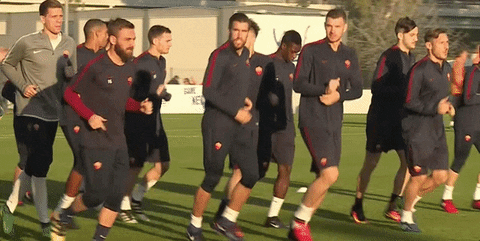

<h3> 4. Conclusion </h3>

I would only recommend this library if you want to make basic requests as grabbing links, attibutes, or text, from a url. However, if you have to parse more complex websites, this library will become harder to use and some workaround will be required to reach the information that you need. Personally, going through the official tutorial has not been sufficient to solve the issues I encountered. On top of that, <b>requests-HTML</b> has a substantial number of open issues on Pypi.org and Github (~80 at the moment). So, before using it,  I would suggest you have a look at this website: https://www.scraperapi.com/blog/the-10-best-web-scraping-tools that will help you to select the best library based on the problem you are trying to solve, and also give a try to Gazpacho (https://pypi.org/project/gazpacho/), which just came out, has no reported issues so far, and will help you to tackle most of your tasks in a very fast and easy way!